In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [209]:
df = pd.read_csv("customer-churn.csv")   # replace with your file name
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [210]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [211]:
# Check missing values
df['tenure'].isnull().sum()

# Fill missing values using median
df['tenure'] = df['tenure'].fillna(df['tenure'].median())

# Verify
df['tenure'].isnull().sum()


np.int64(0)

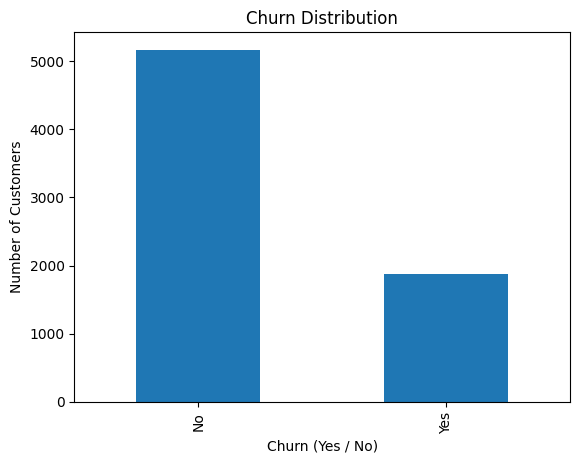

In [212]:
plt.figure()
df['Churn'].value_counts().plot(kind='bar')
plt.title("Churn Distribution")
plt.xlabel("Churn (Yes / No)")
plt.ylabel("Number of Customers")
plt.show()


In [213]:
df.duplicated(subset='customerID').sum()
df = df.drop_duplicates(subset='customerID')

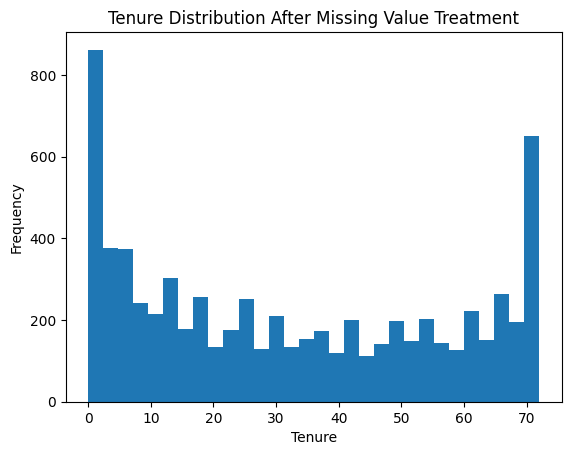

In [214]:
plt.figure()
plt.hist(df['tenure'], bins=30)
plt.title("Tenure Distribution After Missing Value Treatment")
plt.xlabel("Tenure")
plt.ylabel("Frequency")
plt.show()


In [215]:
df['gender'] = df['gender'].str.strip().str.lower()
df['gender'] = df['gender'].replace({'male': 'Male', 'female': 'Female'})
df['gender'].value_counts()


gender
Male      3555
Female    3488
Name: count, dtype: int64

In [216]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].isnull().sum()
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [217]:
Q1 = df['MonthlyCharges'].quantile(0.25)
Q3 = df['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

lower, upper


(np.float64(-46.02499999999999), np.float64(171.375))

In [218]:
df = df[(df['MonthlyCharges'] >= lower) & (df['MonthlyCharges'] <= upper)]


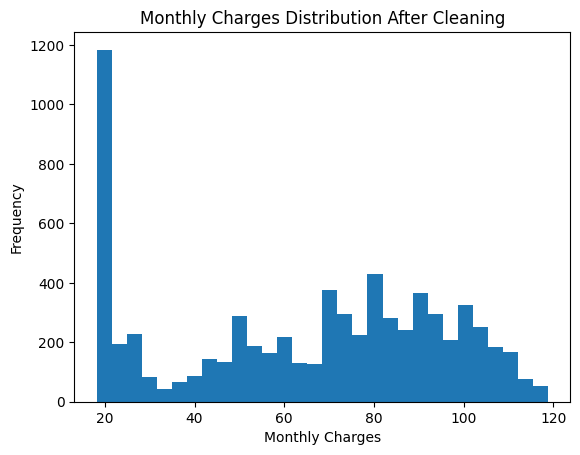

In [219]:
plt.figure()
plt.hist(df['MonthlyCharges'], bins=30)
plt.title("Monthly Charges Distribution After Cleaning")
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.show()


In [220]:
binary_cols = [
    'Partner', 'Dependents', 'PhoneService',
    'PaperlessBilling', 'Churn'
]

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


In [221]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})


In [222]:
df = pd.get_dummies(df, drop_first=True)


In [223]:
df.columns
df = df.drop(columns=['customerID'], errors='ignore')


In [224]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Columns: 7073 entries, gender to PaymentMethod_Mailed check
dtypes: bool(7063), float64(2), int64(8)
memory usage: 48.0 MB


gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
                                        ..
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
Length: 7073, dtype: int64